In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
from pathlib import Path

## Import CSV

In [2]:
# 1. Create a DataFrame for the Presidential Election data. 
file_to_open = ("election_groups.csv")
ml_df = pd.read_csv(file_to_open,  encoding="ISO-8859-1")
ml_df.head()

,Voter_ID,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
0,704844,SEVEN HILLS,44131,NOPTY,1959,0,t,D,t,0,t,D,t,Boomers
1,1658758,PARMA,44130,REP,1968,0,t,R,t,R,t,D,t,Generation X
2,2005536,BROADVIEW HTS,44147,REP,1976,0,t,R,t,R,t,D,t,Generation X
3,2465762,SOLON,44139,NOPTY,1991,0,f,0,f,0,t,0,f,Millennials
4,710633,INDEPENDENCE,44131,REP,1968,0,t,R,t,R,t,0,t,Generation X


## Data Cleaning

In [3]:
#Replace True and False Values with 0 and 1
ml_df.replace(('f', 't'), (0, 1), inplace=True)

In [4]:
ml_df.shape

(870075, 14)

In [5]:
#Column Datatypes
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870075 entries, 0 to 870074
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Voter_ID               870075 non-null  int64 
 1   City                   870075 non-null  object
 2   Zip_Code               870075 non-null  int64 
 3   Party                  870075 non-null  object
 4   Birth_Year             870075 non-null  int64 
 5   Primary_Election_2020  870075 non-null  object
 6   General_Election_2020  870075 non-null  int64 
 7   Primary_Election_2016  870075 non-null  object
 8   General_Election_2016  870075 non-null  int64 
 9   Primary_Election_2012  870075 non-null  object
 10  General_Election_2012  870075 non-null  int64 
 11  Primary_Election_2008  870075 non-null  object
 12  General_Election_2008  870075 non-null  int64 
 13  Generational_Group     870075 non-null  object
dtypes: int64(7), object(7)
memory usage: 92.9+ MB


In [6]:
# Set voter_id_org column as index
ml_df =ml_df.set_index('Voter_ID')

In [10]:
# Hand categorical data
# code primary election data into integers
#D is Democrat, R is Republican, L is Libertarian, G is Green, 0, " ", X and N is non-party, issues only ballot


In [7]:
party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 3, " ": 3, "G": 4, "X": 3}
ml_df['Primary_Election_2016'] = ml_df['Primary_Election_2016'].apply(lambda x:party[x])
ml_df['Primary_Election_2012'] = ml_df['Primary_Election_2012'].apply(lambda x:party[x])
ml_df['Primary_Election_2008'] = ml_df['Primary_Election_2008'].apply(lambda x:party[x])
ml_df['Primary_Election_2020'] = ml_df['Primary_Election_2020'].apply(lambda x:party[x])


In [8]:
ml_df.head()

,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
Voter_ID,,,,,,,,,,,,,
704844,SEVEN HILLS,44131,NOPTY,1959,3,1,0,1,3,1,0,1,Boomers
1658758,PARMA,44130,REP,1968,3,1,1,1,1,1,0,1,Generation X
2005536,BROADVIEW HTS,44147,REP,1976,3,1,1,1,1,1,0,1,Generation X
2465762,SOLON,44139,NOPTY,1991,3,0,3,0,3,1,3,0,Millennials
710633,INDEPENDENCE,44131,REP,1968,3,1,1,1,1,1,3,1,Generation X


In [9]:
ml_df["Party"].unique()

array(['NOPTY', 'REP', 'DEM', 'GRE', 'LIB'], dtype=object)

In [10]:
# Handle Categorical "Party" columns
P_ID = {"DEM": 0, "REP": 1,"LIB": 2, "NOPTY": 3, "GRE": 4}
ml_df["Party"] = ml_df["Party"].apply(lambda x:P_ID[x])
ml_df.head()

,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
Voter_ID,,,,,,,,,,,,,
704844,SEVEN HILLS,44131,3,1959,3,1,0,1,3,1,0,1,Boomers
1658758,PARMA,44130,1,1968,3,1,1,1,1,1,0,1,Generation X
2005536,BROADVIEW HTS,44147,1,1976,3,1,1,1,1,1,0,1,Generation X
2465762,SOLON,44139,3,1991,3,0,3,0,3,1,3,0,Millennials
710633,INDEPENDENCE,44131,1,1968,3,1,1,1,1,1,3,1,Generation X


In [11]:
group = {"Silent": 1,"Boomers": 2, "Generation X": 3, "Millennials": 4, "Generation Z": 5}
ml_df["Generational_Group"] = ml_df["Generational_Group"].apply(lambda x:group[x])
ml_df.head()

,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
Voter_ID,,,,,,,,,,,,,
704844,SEVEN HILLS,44131,3,1959,3,1,0,1,3,1,0,1,2
1658758,PARMA,44130,1,1968,3,1,1,1,1,1,0,1,3
2005536,BROADVIEW HTS,44147,1,1976,3,1,1,1,1,1,0,1,3
2465762,SOLON,44139,3,1991,3,0,3,0,3,1,3,0,4
710633,INDEPENDENCE,44131,1,1968,3,1,1,1,1,1,3,1,3


In [12]:
ml_df["City"].unique()

array(['SEVEN HILLS', 'PARMA', 'BROADVIEW HTS', 'SOLON', 'INDEPENDENCE',
       'EUCLID', 'CLEVELAND HTS', 'GARFIELD HTS', 'CLEVELAND',
       'ROCKY RIVER', 'WESTLAKE', 'ORANGE', 'PEPPER PIKE', 'MAPLE HTS',
       'EAST CLEVELAND', 'BROOK PARK', 'NORTH ROYALTON', 'HIGHLAND HTS',
       'WARRENSVILLE HTS', 'FAIRVIEW PARK', 'SOUTH EUCLID', 'BEREA',
       'MIDDLEBURG HTS', 'LAKEWOOD', 'LYNDHURST', 'SHAKER HTS',
       'BROOKLYN', 'OLMSTED FALLS', 'UNIVERSITY HTS', 'GATES MILLS',
       'MAYFIELD HTS', 'PARMA HTS', 'BEACHWOOD', 'RICHMOND HTS',
       'BRECKSVILLE', 'BEDFORD', 'BEDFORD HTS', 'OAKWOOD',
       'NORTH OLMSTED', 'OLMSTED TWP', 'STRONGSVILLE', 'BROOKLYN HTS',
       'NEWBURGH HTS', 'BAY VILLAGE', 'MORELAND HILLS', 'WALTON HILLS',
       'CUYAHOGA HTS', 'VALLEY VIEW', 'MAYFIELD VILLAGE', 'BENTLEYVILLE',
       'GLENWILLOW', 'CHAGRIN FALLS', 'HUNTING VALLEY', 'BRATENAHL',
       'WOODMERE', 'HIGHLAND HILLS', 'NORTH RANDALL', 'LINNDALE',
       'CHAGRIN FALLS TWP'], dtype=object

In [13]:
# Code the cities to unique #s
cities = {'SEVEN HILLS': 1, 'PARMA': 2, 'BROADVIEW HTS': 3, 'SOLON': 4, 'INDEPENDENCE': 5,
       'EUCLID': 6, 'CLEVELAND HTS': 7, 'GARFIELD HTS': 8, 'CLEVELAND': 9,
       'ROCKY RIVER': 10, 'WESTLAKE': 11, 'ORANGE': 12, 'PEPPER PIKE':13, 'MAPLE HTS':14,
       'EAST CLEVELAND':15, 'BROOK PARK':16, 'NORTH ROYALTON':17, 'HIGHLAND HTS':18,
       'WARRENSVILLE HTS':19, 'FAIRVIEW PARK':20, 'SOUTH EUCLID':21, 'BEREA':22,
       'MIDDLEBURG HTS':23, 'LAKEWOOD':24, 'LYNDHURST':25, 'SHAKER HTS':25,
       'BROOKLYN':27, 'OLMSTED FALLS':28, 'UNIVERSITY HTS':29, 'GATES MILLS':30,
       'MAYFIELD HTS':31, 'PARMA HTS':32, 'BEACHWOOD':33, 'RICHMOND HTS':33,
       'BRECKSVILLE':34, 'BEDFORD':35, 'BEDFORD HTS':36, 'OAKWOOD':37,
       'NORTH OLMSTED':38, 'OLMSTED TWP':39, 'STRONGSVILLE':40, 'BROOKLYN HTS':41,
       'NEWBURGH HTS':42, 'BAY VILLAGE':43, 'MORELAND HILLS':44, 'WALTON HILLS':45,
       'CUYAHOGA HTS':46, 'VALLEY VIEW':47, 'MAYFIELD VILLAGE':48, 'BENTLEYVILLE':49,
       'GLENWILLOW':50, 'CHAGRIN FALLS':51, 'HUNTING VALLEY':52, 'BRATENAHL':53,
       'WOODMERE':54, 'HIGHLAND HILLS':55, 'NORTH RANDALL':56, 'LINNDALE': 57,
       'CHAGRIN FALLS TWP': 58}

ml_df["City"] = ml_df["City"].apply(lambda x:cities[x])


In [14]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870075 entries, 704844 to 3017222
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   City                   870075 non-null  int64
 1   Zip_Code               870075 non-null  int64
 2   Party                  870075 non-null  int64
 3   Birth_Year             870075 non-null  int64
 4   Primary_Election_2020  870075 non-null  int64
 5   General_Election_2020  870075 non-null  int64
 6   Primary_Election_2016  870075 non-null  int64
 7   General_Election_2016  870075 non-null  int64
 8   Primary_Election_2012  870075 non-null  int64
 9   General_Election_2012  870075 non-null  int64
 10  Primary_Election_2008  870075 non-null  int64
 11  General_Election_2008  870075 non-null  int64
 12  Generational_Group     870075 non-null  int64
dtypes: int64(13)
memory usage: 92.9 MB


In [15]:
corr_matrix = ml_df.corr()
corr_matrix['General_Election_2020'].sort_values(ascending=False)

General_Election_2020    1.000000
General_Election_2016    0.434058
General_Election_2012    0.340591
General_Election_2008    0.335148
City                     0.109691
Zip_Code                 0.051428
Primary_Election_2012   -0.241401
Generational_Group      -0.269934
Birth_Year              -0.279956
Primary_Election_2008   -0.287192
Primary_Election_2020   -0.306218
Primary_Election_2016   -0.335290
Party                   -0.389422
Name: General_Election_2020, dtype: float64

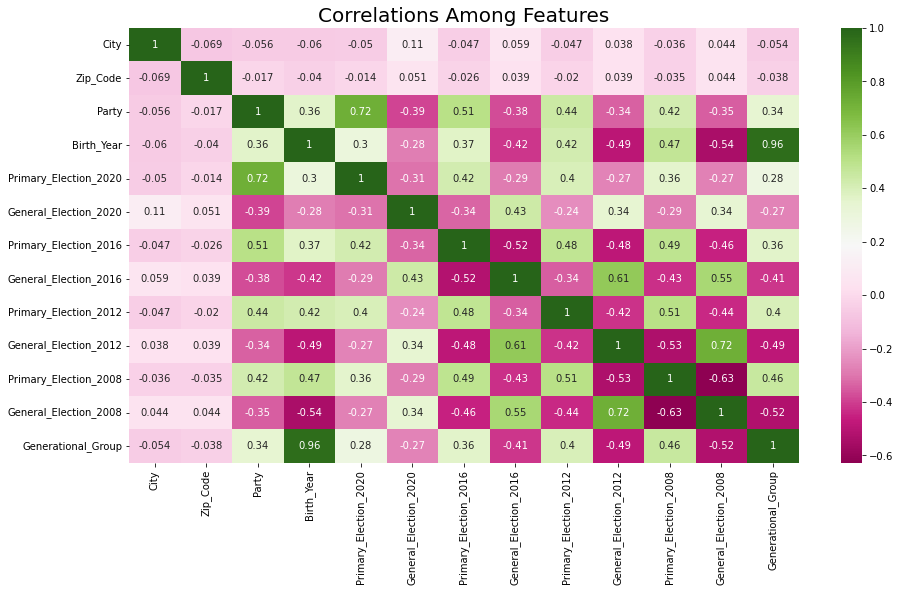

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (15,8))
sb.heatmap(ml_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [17]:
ml_2020 = ml_df[['City', 'Zip_Code', 'Party', 'Birth_Year', 'General_Election_2020', 'Primary_Election_2020', 'Generational_Group']].copy()
ml_2020.head()

,City,Zip_Code,Party,Birth_Year,General_Election_2020,Primary_Election_2020,Generational_Group
Voter_ID,,,,,,,
704844,1,44131,3,1959,1,3,2
1658758,2,44130,1,1968,1,3,3
2005536,3,44147,1,1976,1,3,3
2465762,4,44139,3,1991,0,3,4
710633,5,44131,1,1968,1,3,3


In [18]:
ml_2020 = ml_2020[ml_2020['Birth_Year'] <= 2002]
ml_2020['Birth_Year'].describe()

count    864312.000000
mean       1971.875392
std          18.360409
min        1928.000000
25%        1957.000000
50%        1972.000000
75%        1988.000000
max        2002.000000
Name: Birth_Year, dtype: float64

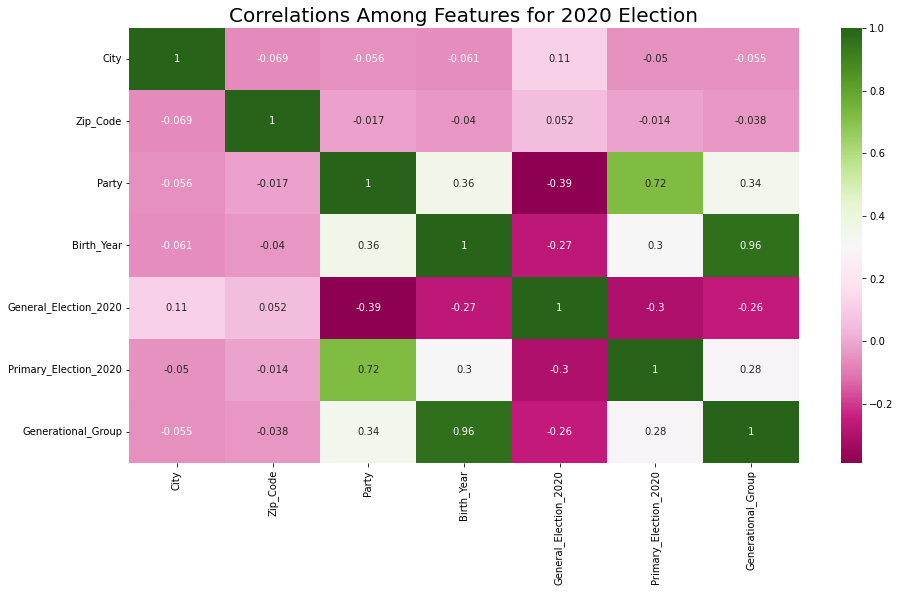

In [19]:
plt.subplots(figsize = (15,8))
sb.heatmap(ml_2020.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features for 2020 Election", fontsize = 20);

In [20]:
ml_2016 = ml_df[ml_df['Birth_Year'] <= 1998]
ml_2016['Birth_Year'].describe()

count    820467.000000
mean       1970.352997
std          17.588824
min        1928.000000
25%        1957.000000
50%        1971.000000
75%        1986.000000
max        1998.000000
Name: Birth_Year, dtype: float64

In [21]:
ml_2016 = ml_2016[['City', 'Zip_Code', 'Party', 'Birth_Year', 'General_Election_2020', 'Primary_Election_2020',  'General_Election_2016', 'Primary_Election_2016', 'Generational_Group']].copy()
ml_2016.head()

,City,Zip_Code,Party,Birth_Year,General_Election_2020,Primary_Election_2020,General_Election_2016,Primary_Election_2016,Generational_Group
Voter_ID,,,,,,,,,
704844,1,44131,3,1959,1,3,1,0,2
1658758,2,44130,1,1968,1,3,1,1,3
2005536,3,44147,1,1976,1,3,1,1,3
2465762,4,44139,3,1991,0,3,0,3,4
710633,5,44131,1,1968,1,3,1,1,3


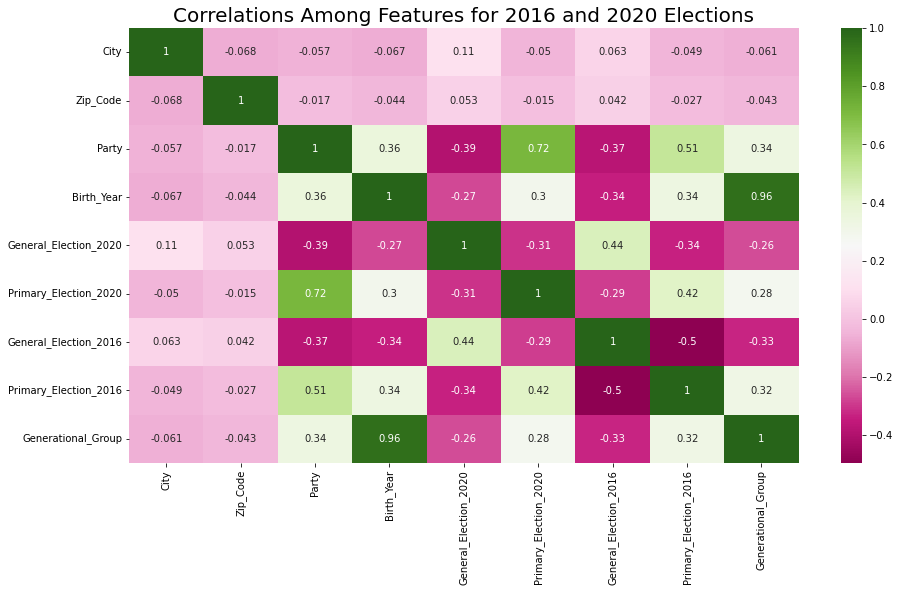

In [22]:
plt.subplots(figsize = (15,8))
sb.heatmap(ml_2016.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features for 2016 and 2020 Elections", fontsize = 20);

In [ ]:
# plt.subplots(figsize = (15,8))
# sb.barplot(x = "City", y = per_city, data=ml_df, edgecolor=(0,0,0), linewidth=2)
# # plt.title("Voting By City Distribution", fontsize = 15)
# # plt.ylabel("2020_General_Election", fontsize = 15)
# # plt.xlabel("Cities",fontsize = 15)
# # plt.xticks("City")

# Machine Learning on 2016 & 2020 election - Voters Born 1928-1998

In [23]:
x = 
y = ml_2016["General_Election_2020"]

In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = ml_2016.drop("General_Election_2020",axis=1)
y = ml_2016["General_Election_2020"]
eclf1 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))
np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))
eclf2 = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                         voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))

[1 1 1 ... 1 1 0]
[1 1 1 ... 1 0 0]


In [ ]:
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

In [ ]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
  
# loading iris dataset
iris = load_iris()
X = ml_2016.drop("General_Election_2020",axis=1)
Y = ml_2016["General_Election_2020"]
  
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.20, 
                                                    random_state = 1)
  
# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

Text(0.5, 1.0, 'Classifier Accuracy')

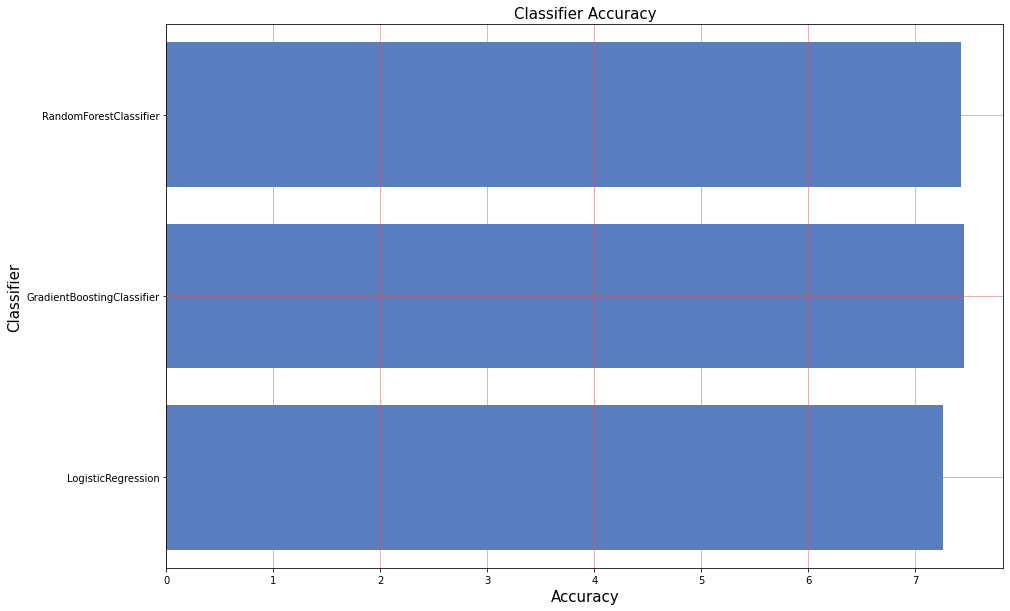

1    7.450616
0    7.430978
2    7.256516
Name: Accuracy, dtype: float64

0        RandomForestClassifier
1    GradientBoostingClassifier
2            LogisticRegression
Name: Classifier, dtype: object

## From above results we can say that gradient boosting classifier gave the best result for our dataset

In [48]:
classifier = GradientBoostingClassifier()

In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 33)

classifier.fit(X_train,Y_train)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X_train, Y_train,cv=5,
scoring="accuracy").mean()

In [50]:
score 


0.7448560937308079

## Confusion Matrices

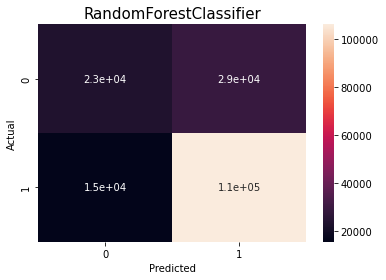

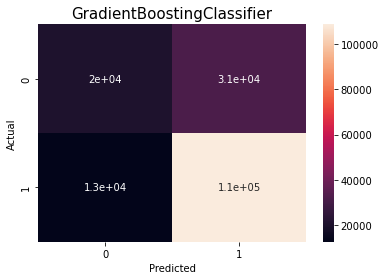

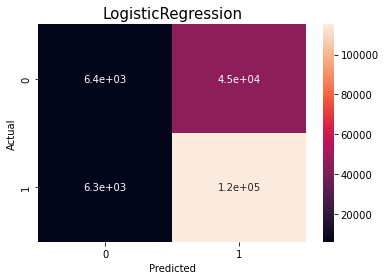

In [51]:
for classifier in classifiers:
    

    classifier.fit(X_train,Y_train)

    p_vals = classifier.predict(X_test)

    confusion_matrix = pd.crosstab(Y_test, p_vals, rownames=['Actual'], colnames=['Predicted'])

    sb.heatmap(confusion_matrix, annot=True)
    plt.title( classifier.__class__.__name__,fontsize=15)
    plt.show()

## Optimize Parameters

In [57]:
X_train.info

<bound method DataFrame.info of           City  Zip_Code  Party  Birth_Year  Primary_Election_2020  \
Voter_ID                                                             
2707789      9     44109      3        1971                      3   
2703854      7     44106      3        1992                      3   
2878458      9     44120      3        1952                      3   
821826       1     44131      0        1968                      3   
2644573     38     44070      3        1987                      3   
...        ...       ...    ...         ...                    ...   
2723059      9     44111      0        1997                      3   
2476089     25     44122      0        1969                      0   
2142338      9     44111      3        1986                      3   
2777018      6     44123      3        1994                      3   
818666      40     44149      1        1953                      1   

          Generational_Group  
Voter_ID                  

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

parameters = {
    "learning_rate": [0.01, 0.1,1, 10, 100],
    "max_depth":[1,3,5,7,9],
    "n_estimators":[5, 50, 250, 500]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

clf.fit(X_train, Y_train.values.ravel())
#converting the clf.cv_results to dataframe
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

KeyboardInterrupt: 

# Stackoverflow code (https://stackoverflow.com/questions/58781601/parameter-tuning-using-gridsearchcv-for-gradientboosting-classifier-in-python)

In [ ]:
https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/